In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.stem import PorterStemmer,WordNetLemmatizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf

In [8]:
true = pd.read_csv("/Users/chengling/Downloads/CS3244project-master/data/BuzzFeed_real_news_content.csv")
false = pd.read_csv("/Users/chengling/Downloads/CS3244project-master/data/BuzzFeed_fake_news_content.csv")

true['category'] = 1
false['category'] = 0

df = pd.concat([true,false]) 

df = df.drop(['id','url','top_img','authors','source','movies','images','canonical_link','meta_data'],axis = 1)

df.tail(5)

,title,text,publish_date,category
86,Hillary’s TOP Donor Country Just Auctioned Off...,Hillary’s TOP Donor Country Just Auctioned Off...,{'$date': 1474912025000},0
87,Cavuto Just Exposed Lester Holt's Lies During ...,Advertisement - story continues below\n\nThe f...,{'$date': 1474934400000},0
88,"The AP, In 2004, Said Your Boy Obama Was BORN ...",Well THAT’S Weird. If the Birther movement is ...,{'$date': 1474207108000},0
89,People Noticed Something Odd About Hillary's O...,\n\nThere’s a lot to be discussed about last n...,{'$date': 1475000011000},0
90,People Noticed Something Odd About Hillary’s O...,People Noticed Something Odd About Hillary’s O...,{'$date': 1475010040000},0


In [9]:
df.isna().sum()

df.title.count()

#df.subject.value_counts()

df['text'] = df['text'] + " " + df['title'] + " " 
del df['title']
#del df['subject']
del df['publish_date']

In [10]:
## removing noisy words from text 
stop = set(stopwords.words('english'))
punctuation = list(string.punctuation)
stop.update(punctuation)

stop

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'need

In [20]:
#stemming and lemmatization

stemmer = PorterStemmer()
def stem_text(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            word = stemmer.stem(i.strip())
            final_text.append(word)
    return " ".join(final_text)    

df.text = df.text.apply(stem_text)

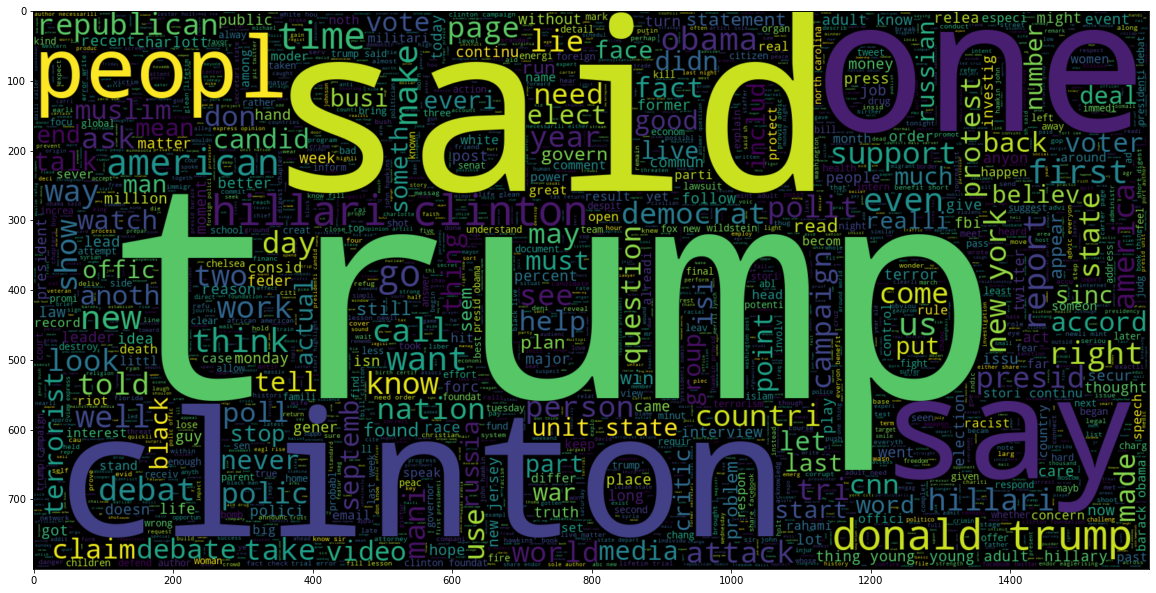

In [13]:
## Word Cloud

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 3000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df.text))
plt.imshow(wc , interpolation = 'bilinear')

In [14]:
##splitting training and testing data

x_train,x_test,y_train,y_test = train_test_split(df.text,df.category)

In [15]:
## Text to vector conversion

cv=CountVectorizer(min_df=0,max_df=1,ngram_range=(1,2))
#transformed train reviews
cv_train_reviews=cv.fit_transform(x_train)
#transformed test reviews
cv_test_reviews=cv.transform(x_test)

print('BOW_cv_train:',cv_train_reviews.shape)
print('BOW_cv_test:',cv_test_reviews.shape)

BOW_cv_train: (136, 36422)
BOW_cv_test: (46, 36422)


In [16]:
model = Sequential()
model.add(Dense(units = 100 , activation = 'relu' , input_dim = cv_train_reviews.shape[1]))
model.add(Dense(units = 50 , activation = 'relu'))
model.add(Dense(units = 25 , activation = 'relu'))
model.add(Dense(units = 10 , activation = 'relu'))
model.add(Dense(units = 1 , activation = 'sigmoid'))

In [17]:
model.compile(optimizer = 'adam' , loss = 'binary_crossentropy' , metrics = ['accuracy'])

In [19]:
model.fit(cv_train_reviews,y_train , epochs = 5)

Epoch 1/5


InvalidArgumentError:  TypeError: 'SparseTensor' object is not subscriptable
Traceback (most recent call last):

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 242, in __call__
    return func(device, token, args)

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/script_ops.py", line 131, in __call__
    ret = self._func(*args)

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/autograph/impl/api.py", line 302, in wrapper
    return func(*args, **kwargs)

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 513, in py_method
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 513, in <listcomp>
    return [slice_array(inp) for inp in flat_inputs]

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/data_adapter.py", line 511, in slice_array
    return training_utils.slice_arrays(data, ind.numpy(),

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_utils.py", line 391, in slice_arrays
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

  File "/Users/chengling/opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training_utils.py", line 391, in <listcomp>
    entries = [[x[i:i + 1] for i in indices] for x in arrays]

TypeError: 'SparseTensor' object is not subscriptable


	 [[{{node EagerPyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_935]

Function call stack:
train_function


In [29]:
pred = model.predict(cv_test_reviews)

In [30]:
for i in range(len(pred)):
    if(pred[i] > 0.5):
        pred[i] = 1
    else:
        pred[i] = 0

In [31]:
accuracy_score(pred,y_test)

0.5434782608695652

In [24]:
cv_report = classification_report(y_test,pred,target_names = ['0','1'])
print(cv_report)

              precision    recall  f1-score   support

           0       0.80      0.17      0.28        24
           1       0.51      0.95      0.67        22

    accuracy                           0.54        46
   macro avg       0.66      0.56      0.47        46
weighted avg       0.66      0.54      0.46        46



In [25]:
cm_cv = confusion_matrix(y_test,pred)
cm_cv

array([[ 4, 20],
       [ 1, 21]])

In [26]:
cm_cv = pd.DataFrame(cm_cv, index=[0,1], columns=[0,1])
cm_cv.index.name = 'Actual'
cm_cv.columns.name = 'Predicted'

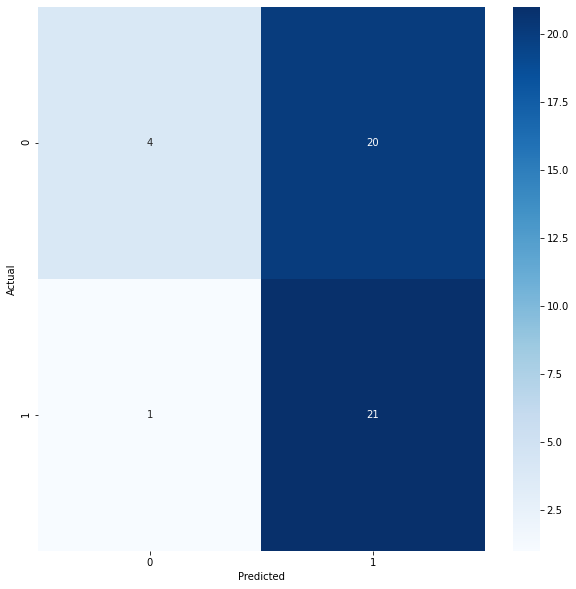

In [27]:
plt.figure(figsize = (10,10))
sns.heatmap(cm_cv,cmap= "Blues",annot = True, fmt='')